In [1]:
import mdtraj as md
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
xy_fp_nhelix_rotate_10 = np.zeros((10, 2001, 75, 2))
xyz_origin_10 = np.zeros((10, 2001, 3792, 3))
xyz_rotate1_10 = np.zeros((10, 2001, 3792, 3))
xy_fp_nhelix_rotate_10 = np.zeros((10, 2001, 75, 2))
for i in range(10):
    path = 'run%d/'%(i+1)
    traj = md.load_xtc('%ssys_hydro_run_promb.xtc'%path, top = 'promb.gro')
    xyz = traj.xyz
    top = traj.topology
    table, bonds = top.to_dataframe()
    table_pro = table[table.resName!='DPPC']
    xyz_pro = xyz[:,table.resName!='DPPC',:]
    chain_start = table_pro[table_pro.resSeq==1]['serial'].values[::2]
    chain_end = np.append(chain_start[1:]-1, table_pro['serial'].values[-1])
    
    for k in range(6):
        table_pro.loc[(table_pro.serial>=chain_start[k])&(table_pro.serial<=chain_end[k]),'chainID'] = i+1
        if(k<3):
            table_pro.loc[(table_pro.serial>=chain_start[k])&(table_pro.serial<=chain_end[k]),'resSeq'] = table_pro['resSeq'][(table_pro.serial>=chain_start[k])&(table_pro.serial<=chain_end[k])].values + 815
        else:
            table_pro.loc[(table_pro.serial>=chain_start[k])&(table_pro.serial<=chain_end[k]),'resSeq'] = table_pro['resSeq'][(table_pro.serial>=chain_start[k])&(table_pro.serial<=chain_end[k])].values + 685
    
    xyz_origin_10[i,:,:,:] = xyz_pro.copy()
    
    xy_fp_nhelix_rotate = np.zeros((2001, 75, 2))
    for j in range(2001):

        frame_num = j
        select0 = (table_pro.resSeq>=912)&(table_pro.resSeq<=984)
        select1 = (table_pro.resSeq>=816)&(table_pro.resSeq<=984)
        select2 = (table_pro.resSeq>=816)&(table_pro.resSeq<=855)
        select3 = (table_pro.resSeq>=816)&(table_pro.resSeq<=825)

        points_data1 = xyz_pro[frame_num,select1,:].T
        covMatrix1 = np.cov(points_data1)
        a1,b1 = np.linalg.eigh(covMatrix1)

        x_fit = xyz_pro[frame_num,:,0] - np.mean(xyz_pro[frame_num,select0,0])
        y_fit = xyz_pro[frame_num,:,1] - np.mean(xyz_pro[frame_num,select0,1])
        z_fit = xyz_pro[frame_num,:,2] - np.mean(xyz_pro[frame_num,select0,2])

        xyz_fit_rotate = np.dot(b1.T, [x_fit, y_fit, z_fit])
        xyz_rotate1_10[i,j,:,:] = xyz_fit_rotate.T
        
        x_nhelix = xyz_fit_rotate[0,select3]
        y_nhelix = xyz_fit_rotate[1,select3]
        points_data2 = [x_nhelix, y_nhelix]
        covMatrix2 = np.cov(points_data2)
        a2,b2 = np.linalg.eigh(covMatrix2)

        temp = np.dot(b2.T, points_data2)
        if(np.sum(temp[1,:]>0) > np.sum(temp[1,:]<0)):
            temp[1,:] = -temp[1,:]

        xy_fp_nhelix_rotate[j,:,:] = temp.T
    
    xy_fp_nhelix_rotate_10[i,:,:,:] = xy_fp_nhelix_rotate

/Users/ruisu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [3]:
select4 = (table_pro.resSeq>=826)&(table_pro.resSeq<=911)

In [4]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['figure.titlesize'] = 32

Text(0, 0.5, 'prob. density')

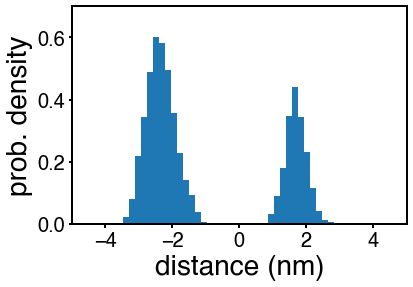

In [29]:
plt.hist(xy_fp_nhelix_rotate_10[5,:,:,1].ravel(), bins=40, density=True)
plt.xlim([-5,5])
plt.ylim([0,0.7])
plt.xlabel('distance (nm)')
plt.ylabel('prob. density')

Text(0, 0.5, 'prob. density')

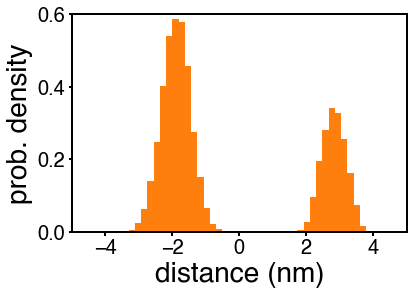

In [9]:
plt.hist(xy_fp_nhelix_rotate_10[8,:,:,1].ravel(), bins=40, density=True,color='tab:orange')
plt.xlim([-5,5])
plt.ylim([0,0.6])
plt.xlabel('distance (nm)')
plt.ylabel('prob. density')

In [9]:
frame_plot = 1800
run_plot = 6

Text(0, 0.5, 'z (nm)')

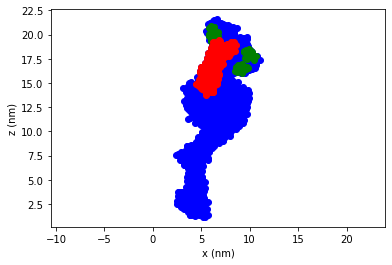

In [10]:
plt.plot(xyz_origin_10[run_plot,frame_plot,:,0],xyz_origin_10[run_plot,frame_plot,:,2],'bo')
plt.plot(xyz_origin_10[run_plot,frame_plot,select3,0],xyz_origin_10[run_plot,frame_plot,select3,2],'go')
plt.plot(xyz_origin_10[run_plot,frame_plot,select0,0],xyz_origin_10[run_plot,frame_plot,select0,2],'ro')
plt.axis('equal')
plt.xlabel('x (nm)')
plt.ylabel('z (nm)')

Text(0, 0.5, 'y (nm)')

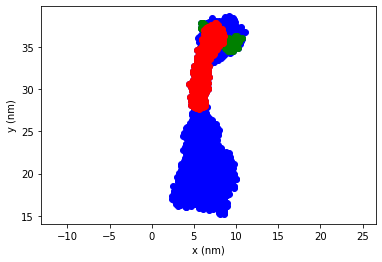

In [11]:
plt.plot(xyz_origin_10[run_plot,frame_plot,:,0],xyz_origin_10[run_plot,frame_plot,:,1],'bo')
plt.plot(xyz_origin_10[run_plot,frame_plot,select3,0],xyz_origin_10[run_plot,frame_plot,select3,1],'go')
plt.plot(xyz_origin_10[run_plot,frame_plot,select0,0],xyz_origin_10[run_plot,frame_plot,select0,1],'ro')
plt.axis('equal')
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

Text(0, 0.5, 'z (nm)')

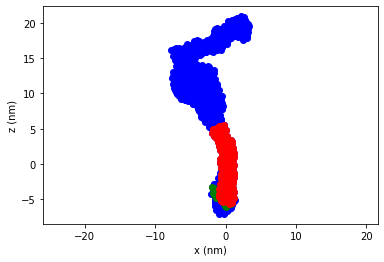

In [12]:
plt.plot(xyz_rotate1_10[run_plot,frame_plot,:,0],xyz_rotate1_10[run_plot,frame_plot,:,2],'bo')
plt.plot(xyz_rotate1_10[run_plot,frame_plot,select3,0],xyz_rotate1_10[run_plot,frame_plot,select3,2],'go')
plt.plot(xyz_rotate1_10[run_plot,frame_plot,select0,0],xyz_rotate1_10[run_plot,frame_plot,select0,2],'ro')
plt.axis('equal')
plt.xlabel('x (nm)')
plt.ylabel('z (nm)')

Text(0, 0.5, 'y (nm)')

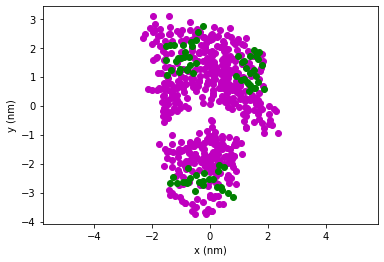

In [46]:
frame_plot = 1800
run_plot = 2
#plt.plot(xyz_rotate1_10[run_plot,frame_plot,:,0],xyz_rotate1_10[run_plot,frame_plot,:,1],'bo')
plt.plot(xyz_rotate1_10[run_plot,frame_plot,select4,0],xyz_rotate1_10[run_plot,frame_plot,select4,1],'mo')
plt.plot(xyz_rotate1_10[run_plot,frame_plot,select3,0],xyz_rotate1_10[run_plot,frame_plot,select3,1],'go')


#plt.plot(xyz_rotate1_10[run_plot,frame_plot,select0,0],xyz_rotate1_10[run_plot,frame_plot,select0,1],'ro')
plt.axis('equal')
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

Text(0, 0.5, 'y (nm)')

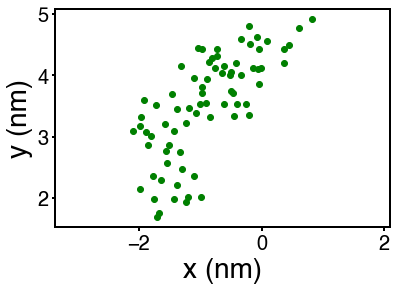

In [403]:
plt.plot(xyz_rotate1_10[run_plot,frame_plot,select3,0],xyz_rotate1_10[run_plot,frame_plot,select3,1],'go')
plt.axis('equal')
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

Text(0, 0.5, 'y (nm)')

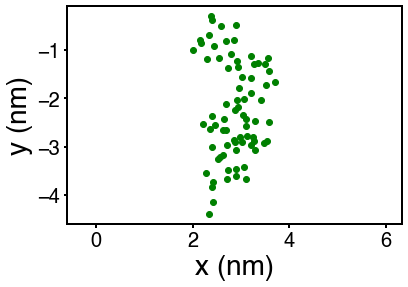

In [404]:
plt.plot(xy_fp_nhelix_rotate_10[run_plot,frame_plot,:,0],xy_fp_nhelix_rotate_10[run_plot,frame_plot,:,1],'go')
plt.axis('equal')
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

Text(0, 0.5, 'y (nm)')

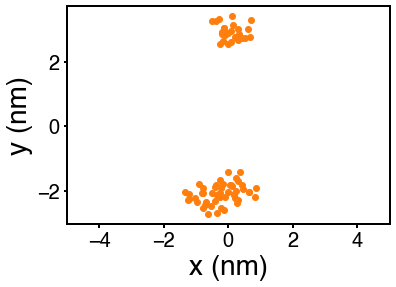

In [7]:
#8347-7822=525
x_plot = xyz_rotate1_10[8,525-500,select3,0]
y_plot = xyz_rotate1_10[8,525-500,select3,1]

covMatrix = np.cov([x_plot,y_plot])
aa,bb = np.linalg.eigh(covMatrix)

plt.plot(x_plot,y_plot,'o',color='tab:orange')
#plt.plot([-3*bb[1,0],3*bb[1,0]],[-3*bb[1,1],3*bb[1,1]])
plt.gca().set_aspect('equal',adjustable='box')
plt.xlim([-5,5])
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

In [336]:
bb[1,:]

array([0.07088108, 0.99748477])

Text(0, 0.5, 'y (nm)')

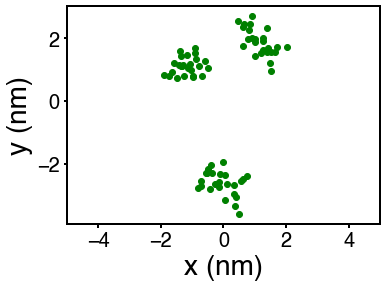

In [337]:
#579
x_plot = xyz_rotate1_10[0,579-500,select3,0]
y_plot = xyz_rotate1_10[0,579-500,select3,1]

covMatrix = np.cov([x_plot,y_plot])
aa,bb = np.linalg.eigh(covMatrix)

plt.plot(x_plot,y_plot,'go')
#plt.plot([-3*bb[1,0],3*bb[1,0]],[-3*bb[1,1],3*bb[1,1]])
plt.gca().set_aspect('equal',adjustable='box')
plt.xlim([-5,5])
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

In [338]:
bb[1,:]

array([0.10072708, 0.99491409])

Text(0, 0.5, 'y (nm)')

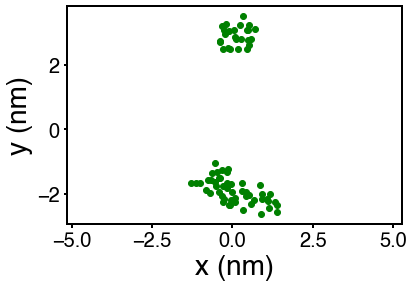

In [339]:
8347
plt.plot(xyz_rotate1_10[8,1200,select3,0],xyz_rotate1_10[8,1200,select3,1],'go')
plt.axis('equal')
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

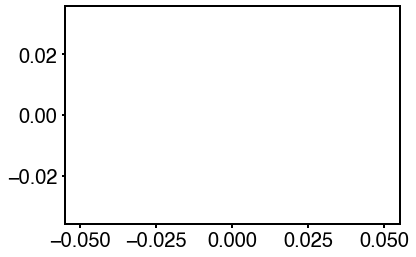

In [340]:
plt.plot
plt.axis('equal')

In [341]:
table_pro[table_pro.chainID==6]

,serial,name,element,resSeq,resName,chainID,segmentID


In [342]:
table_pro.loc[table.serial>20000,'chainID']

36504    10
36505    10
36506    10
36507    10
36508    10
         ..
40291    10
40292    10
40293    10
40294    10
40295    10
Name: chainID, Length: 3792, dtype: int64

In [343]:
table_pro

,serial,name,element,resSeq,resName,chainID,segmentID
36504,36505,BB,B,816,SER,10,
36505,36506,SC1,S,816,SER,10,
36506,36507,BB,B,817,PHE,10,
36507,36508,SC1,S,817,PHE,10,
36508,36509,SC2,S,817,PHE,10,
...,...,...,...,...,...,...,...
40291,40292,SC1,S,814,LYS,10,
40292,40293,SC2,S,814,LYS,10,
40293,40294,BB,B,815,ARG,10,
40294,40295,SC1,S,815,ARG,10,


In [344]:
'''
x_dppc = xyz[:,table.name == 'PO4',0]
y_dppc = xyz[:,table.name == 'PO4',1]
z_dppc = xyz[:,table.name == 'PO4',2]


fp1_start = table[(table.resName!='DPPC')&(table.resSeq==2)&(table.resName=='PHE')]['serial'].values[0]
fp2_start = table[(table.resName!='DPPC')&(table.resSeq==2)&(table.resName=='PHE')]['serial'].values[4]
fp3_start = table[(table.resName!='DPPC')&(table.resSeq==2)&(table.resName=='PHE')]['serial'].values[8]

fp1_end = table[(table.resName!='DPPC')&(table.resSeq==10)&(table.resName=='LYS')]['serial'].values[0]
fp2_end = table[(table.resName!='DPPC')&(table.resSeq==10)&(table.resName=='LYS')]['serial'].values[3]
fp3_end = table[(table.resName!='DPPC')&(table.resSeq==10)&(table.resName=='LYS')]['serial'].values[6]

xyz_fp1 = xyz[:,(table.serial>=fp1_start)&(table.serial<=fp1_end),:]
xyz_fp2 = xyz[:,(table.serial>=fp2_start)&(table.serial<=fp2_end),:]
xyz_fp3 = xyz[:,(table.serial>=fp3_start)&(table.serial<=fp3_end),:]

xyz_hr1 = table[(table.resName!='DPPC')&(table.resSeq==10)&(table.resName=='LYS')]['serial'].values[0]
'''

"\nx_dppc = xyz[:,table.name == 'PO4',0]\ny_dppc = xyz[:,table.name == 'PO4',1]\nz_dppc = xyz[:,table.name == 'PO4',2]\n\n\nfp1_start = table[(table.resName!='DPPC')&(table.resSeq==2)&(table.resName=='PHE')]['serial'].values[0]\nfp2_start = table[(table.resName!='DPPC')&(table.resSeq==2)&(table.resName=='PHE')]['serial'].values[4]\nfp3_start = table[(table.resName!='DPPC')&(table.resSeq==2)&(table.resName=='PHE')]['serial'].values[8]\n\nfp1_end = table[(table.resName!='DPPC')&(table.resSeq==10)&(table.resName=='LYS')]['serial'].values[0]\nfp2_end = table[(table.resName!='DPPC')&(table.resSeq==10)&(table.resName=='LYS')]['serial'].values[3]\nfp3_end = table[(table.resName!='DPPC')&(table.resSeq==10)&(table.resName=='LYS')]['serial'].values[6]\n\nxyz_fp1 = xyz[:,(table.serial>=fp1_start)&(table.serial<=fp1_end),:]\nxyz_fp2 = xyz[:,(table.serial>=fp2_start)&(table.serial<=fp2_end),:]\nxyz_fp3 = xyz[:,(table.serial>=fp3_start)&(table.serial<=fp3_end),:]\n\nxyz_hr1 = table[(table.resName!='

In [345]:
(table_pro.serial>=chain_start[i])&(table_pro.serial<=chain_end[i])

IndexError: index 9 is out of bounds for axis 0 with size 6

In [ ]:
table_pro.serial<=chain_end[i]

In [ ]:
table_pro[table_pro.resSeq==1]['serial'].values[::2]

In [ ]:
chain_end

In [ ]:
table_pro[table_pro.resSeq==1]['serial'].values

In [ ]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

In [ ]:
i=6
#plt.figure(figsize=(15,5))
#plt.plot(np.arange(len(z_dppc))*4/1000,z_viral_mb_lower_10[i,:],'k')
#plt.plot(np.arange(len(z_dppc))*4/1000,z_viral_mb_upper_10[i,:],'k')
#plt.plot(np.arange(len(z_dppc))*4/1000,z_cell_mb_lower_10[i,:],'k')
#plt.plot(np.arange(len(z_dppc))*4/1000,z_cell_mb_upper_10[i,:],'k')
plt.plot(np.arange(len(z_dppc))*4/1000,-helix_cg_10_z[i,0,:].T + z_cell_mb_lower_10[i,:])
plt.plot(np.arange(len(z_dppc))*4/1000,-helix_cg_10_z[i,1,:].T + z_cell_mb_lower_10[i,:])
plt.plot(np.arange(len(z_dppc))*4/1000,-helix_cg_10_z[i,2,:].T + z_cell_mb_lower_10[i,:])
#plt.plot(np.arange(len(z_dppc))*4/1000,z_cell_mb_lower_10[i,:]-2*1.52,'b')
plt.xlim([0,8])
#plt.ylim([0,35])
plt.xlabel('time (µs)')
plt.ylabel('z (nm)')


In [ ]:
i=0

In [ ]:
plt.plot(np.arange(len(z_dppc))*4/1000,helix_cg_10_x[i,0,:].T)
plt.plot(np.arange(len(z_dppc))*4/1000,helix_cg_10_x[i,1,:].T)
plt.plot(np.arange(len(z_dppc))*4/1000,helix_cg_10_x[i,2,:].T)
plt.xlim([0,8])
plt.ylim([-25,25])
plt.xlabel('time (µs)')
plt.ylabel('x (nm)')

In [ ]:
plt.plot(np.arange(len(z_dppc))*4/1000,helix_cg_10_y[i,0,:].T)
plt.plot(np.arange(len(z_dppc))*4/1000,helix_cg_10_y[i,1,:].T)
plt.plot(np.arange(len(z_dppc))*4/1000,helix_cg_10_y[i,2,:].T)


plt.xlim([0,8])
plt.ylim([-25,25])

plt.xlabel('time (µs)')
plt.ylabel('y (nm)')

In [ ]:
aa = ((helix_cg_10_y[:,:,:-1]-helix_cg_10_y[:,:,1:]).ravel())**2 + ((helix_cg_10_x[:,:,:-1]-helix_cg_10_x[:,:,1:]).ravel())**2 + ((helix_cg_10_z[:,:,:-1]-helix_cg_10_z[:,:,1:]).ravel())**2

In [ ]:
np.max(aa)

In [ ]:
np.mean(aa)

In [ ]:
np.std(aa)

In [ ]:
np.sum(np.multiply(helix_cg_10[i,2,:]>(z_cell_mb_lower_10[i,:]-1.52),1))

In [ ]:
helix_cg[0,:] > (z_cell_mb_lower-1.52)

In [ ]:
z_cell_mb_lower-1.52

In [ ]:
np.shape(z_viral_mb_lower)

In [ ]:
contact_prob = np.sum(np.multiply(helix_cg_10[:,0,:]>(z_cell_mb_lower_10[:,:]-1.52),1) + np.multiply(helix_cg_10[:,1,:]>(z_cell_mb_lower_10[:,:]-1.52),1) + np.multiply(helix_cg_10[:,2,:]>(z_cell_mb_lower_10[:,:]-1.52),1),axis=0)

In [ ]:
contact_prob

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(len(contact_prob))/1000*4,contact_prob/10)
plt.xlim([0,8])
plt.ylim([0,1])
plt.xlabel('time (µs)')
plt.ylabel('contact probability')



In [ ]:
plt.hist(helix_cg_10[1,0,:],alpha=0.4)
plt.hist(helix_cg_10[1,1,:],alpha=0.4)
plt.hist(helix_cg_10[1,2,:],alpha=0.4)
plt.plot([np.mean(z_cell_mb_lower_10[2,:]),np.mean(z_cell_mb_lower_10[2,:])],[0,1000])
plt.plot([np.mean(z_cell_mb_lower_10[2,:])-1.52,np.mean(z_cell_mb_lower_10[2,:])-1.52],[0,1000])



In [ ]:
plt.hist(helix_cg_10.ravel(),bins=50)
plt.plot([np.mean(z_cell_mb_lower_10[2,:]),np.mean(z_cell_mb_lower_10[2,:])],[0,1000])
plt.plot([np.mean(z_cell_mb_lower_10[2,:])-2*1.52,np.mean(z_cell_mb_lower_10[2,:])-2*1.52],[0,1000])

In [324]:
trunc = 501
helix_cg_10_cali = helix_cg_10[:,:,trunc:].copy()
helix_cg_10_cali2 = helix_cg_10[:,0,trunc:].copy()
for i in range(10):
    helix_cg_10_cali[i,:,:] = np.mean(z_cell_mb_lower_10[i,trunc:]) - helix_cg_10[i,:,trunc:]
    helix_cg_10_cali2[i,:] = np.mean(z_cell_mb_lower_10[i,trunc:]) - np.max(helix_cg_10[i,:,trunc:],axis=0)
    helix_cg_10_cali0[i,:] = np.mean(z_cell_mb_lower_10[i,:]) - np.max(helix_cg_10[i,:,:],axis=0)


NameError: name 'helix_cg_10' is not defined

In [ ]:
plt.figure()
plt.hist(helix_cg_10_cali2[8,:].ravel(),bins=50,alpha=1)
plt.plot([1,1],[0,80])
plt.ylim([0,80])
plt.xlim([0,6])
plt.xlabel('z (nm)')
plt.ylabel('count')

In [ ]:
np.sum(helix_cg_10_cali[:,0,:].ravel()<2*1.52) / len(helix_cg_10_cali[:,0,:].ravel())

In [ ]:
np.sum(helix_cg_10_cali[:,1,:].ravel()<2*1.52) / len(helix_cg_10_cali[:,1,:].ravel())

In [ ]:
np.sum(helix_cg_10_cali[:,2,:].ravel()<2*1.52) / len(helix_cg_10_cali[:,2,:].ravel())

In [ ]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['figure.titlesize'] = 32

In [ ]:
plt.figure()
plt.hist(helix_cg_10_cali2[np.r_[:8,9],:].ravel(),bins=15,density=True,alpha=1)
plt.plot([2*1.52,2*1.52],[0,0.13])
plt.ylim([0,0.13])
plt.ylabel('probability')
plt.xlabel('distance (nm)')

In [ ]:
a = np.array([1,2,3,4,5,6,7,8,9,10])
a[np.r_[:8,9]]

In [ ]:
np.sum(helix_cg_10_cali2[:,:].ravel()<2*1.52) / len(helix_cg_10_cali2[:,:].ravel())

In [ ]:
np.sum(helix_cg_10_cali2[:,:].ravel()<1)/ len(helix_cg_10_cali2[:,:].ravel())

In [ ]:
0.1%

In [ ]:
40 µm^2/s

In [ ]:
aa = helix_cg_10_cali2[np.r_[:8,9],:].ravel()
bb = helix_cg_10_cali2.ravel()

In [ ]:
plt.hist(aa[aa<2.8],bins=np.linspace(0,2.8,29),alpha=1)
plt.xlim([0,2.8])
plt.title('EI simulation',fontsize=28)
plt.ylabel('count')
plt.xlabel('z (nm)')

In [ ]:
plt.hist(aa[aa<=1.5],bins=np.linspace(0,1.5,16),alpha=1)
plt.xlim([0,1.5])
plt.title('EI simulation',fontsize=28)
plt.ylabel('count')
plt.xlabel('z (nm)')

In [106]:
range(2,4)

range(2, 4)

In [323]:
helix_cg_10_cali0

NameError: name 'helix_cg_10_cali0' is not defined